In [1]:
from scipy.io import arff
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.spatial import distance
import random

/Users/indraaristya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/indraaristya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/indraaristya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
data_path = './data/1year.arff'
data_path2 = './data/2year.arff'
data_path3 = './data/3year.arff'
data_path4 = './data/4year.arff'
data_path5 = './data/5year.arff'

In [3]:
data, meta = arff.loadarff(data_path)
data2, meta2 = arff.loadarff(data_path2)
data3, meta3 = arff.loadarff(data_path3)
data4, meta4 = arff.loadarff(data_path4)
data5, meta5 = arff.loadarff(data_path5)

In [4]:
len(data4)

9792

In [5]:
def euclidean(x1,x2):
     return distance.euclidean(x1, x2)
    
def knn(x_t,x):
    new_data = np.zeros(len(x))
    dist = []
    for i in range(len(x_t)):
        dist.append(euclidean(x,x_t[i]))
    indexSorted = np.argsort(dist)
    for i in range(0,len(x)):
        v = [x_t[indexSorted[0]][i],x_t[indexSorted[1]][i],x_t[indexSorted[2]][i],x_t[indexSorted[4]][i]]
        new_data[i] = np.mean(v)
    return new_data

def handle_imbalance(x_yes, x_no, y_yes):
    x = x_yes
    y = y_yes
    index = np.arange(len(x_yes))
    index = list(index)
    while len(x) < len(x_no)/2:
        idx = random.choice(index)
        x.append(knn(x_yes,x_yes[idx]))
        y.append(str(int(1)))
    return x,y

In [6]:
arr = np.array(data4)
randomize = np.arange(len(arr))
np.random.shuffle(randomize)
np.random.shuffle(randomize)
arr = arr[randomize].tolist()

train_data = arr[:6000]
valid_data = arr[6000:9792]

x_train = []
y_train = []
x_valid = []
y_valid = []

In [7]:
for i in range(0,len(train_data)):
    y = np.array(train_data[i],dtype='float32')
    y = np.nan_to_num(y).tolist()
    y_train.append(str(int(y[64])))
    y.pop()
    x_train.append(y)
x_train = np.array(x_train)

for i in range(0,len(valid_data)):
    y = np.array(valid_data[i],dtype='float32')
    y = np.nan_to_num(y).tolist()
    y_valid.append(str(int(y[64])))
    y.pop()
    x_valid.append(y)
x_valid = np.array(x_valid)

In [8]:
x_train_yes = []
y_train_yes = []
x_train_no = []
y_train_no = []

for i in range(0, len(x_train)):
    if y_train[i] == '1':
        x_train_yes.append(x_train[i])
        y_train_yes.append(y_train[i])
    else:
        x_train_no.append(x_train[i])
        y_train_no.append(y_train[i])

In [9]:
im_x, im_y = handle_imbalance(x_train_yes,x_train_no,y_train_yes)

In [10]:
x_train_us = np.concatenate((x_train_no,im_x))
y_train_us = np.concatenate((y_train_no,im_y))

In [11]:
randomize = np.arange(len(x_train_us))
np.random.shuffle(randomize)
np.random.shuffle(randomize)
x_train_us = x_train_us[randomize]
y_train_us = y_train_us[randomize]

In [12]:
pca = PCA(n_components=30)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
x_train = pca.transform(x_train)
x_valid = pca.transform(x_valid)
x_train_us = pca.transform(x_train_us)

### k-NN dengan Oversampling

In [14]:
kx = np.arange(1,11)
acc_knns_us = []
for k in kx:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train_us, y_train_us) 
    knn_predict = neigh.predict(x_valid)

    cm_knn = confusion_matrix(y_valid, knn_predict)
    acc_knn = accuracy_score(y_valid, knn_predict)
    recall_knn = recall_score(y_valid, knn_predict,average='macro')
    precision_knn = precision_score(y_valid, knn_predict,average='macro')
    f1_knn = f1_score(y_valid, knn_predict,average='macro')
    print(str(k)," "," Acc: ",str(acc_knn), " || Precision: ",str(precision_knn)," || Recall: ",str(recall_knn)," || F1-Score: ",str(f1_knn))
    acc_knns_us.append(acc_knn*100)

1    Acc:  0.852584388185654  || Precision:  0.5092692700423027  || Recall:  0.5177924610914302  || F1-Score:  0.5068839230277304
2    Acc:  0.8889767932489452  || Precision:  0.5128683486661139  || Recall:  0.5161042155354277  || F1-Score:  0.5138317929483878
3    Acc:  0.8465189873417721  || Precision:  0.5261818207297723  || Recall:  0.5564155389964135  || F1-Score:  0.5274015548390855
4    Acc:  0.8578586497890295  || Precision:  0.5261269276393832  || Recall:  0.5507873675310575  || F1-Score:  0.5287000285700911
5    Acc:  0.8314873417721519  || Precision:  0.5360317780226472  || Recall:  0.5903019214430519  || F1-Score:  0.5376434793974509
6    Acc:  0.8412447257383966  || Precision:  0.535958066436018  || Recall:  0.5838378625438704  || F1-Score:  0.539237730614868
7    Acc:  0.8130274261603375  || Precision:  0.5330416136073327  || Recall:  0.5921685994561927  || F1-Score:  0.5298144548414091
8    Acc:  0.8270042194092827  || Precision:  0.5358529980040769  || Recall:  0.592581

In [15]:
print("Acc: ",str(max(acc_knns_us)),'%')
print("F1: ",str(max(acc_knns_us)),'%')
print("==============================")
print("Report")
print(classification_report(y_valid, knn_predict, target_names=['0','1']))

Acc:  88.89767932489451 %
F1:  88.89767932489451 %
Report
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      3589
           1       0.11      0.37      0.17       203

   micro avg       0.81      0.81      0.81      3792
   macro avg       0.54      0.60      0.53      3792
weighted avg       0.91      0.81      0.85      3792



In [16]:
confusion_matrix(y_valid, knn_predict)

array([[2992,  597],
       [ 127,   76]])

### kNN tanpa oversampling

In [17]:
kx = np.arange(1,11)
acc_knns = []
for k in kx:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train, y_train) 
    knn_predict = neigh.predict(x_valid)

    cm_knn = confusion_matrix(y_valid, knn_predict)
    acc_knn = accuracy_score(y_valid, knn_predict)
    recall_knn = recall_score(y_valid, knn_predict,average='macro')
    precision_knn = precision_score(y_valid, knn_predict,average='macro')
    f1_knn = f1_score(y_valid, knn_predict,average='macro')
    print(str(k)," "," Acc: ",str(acc_knn), " || Precision: ",str(precision_knn)," || Recall: ",str(recall_knn)," || F1-Score: ",str(f1_knn))
    acc_knns.append(acc_knn*100)

1    Acc:  0.9032172995780591  || Precision:  0.5192483296213809  || Recall:  0.5189797232100822  || F1-Score:  0.5191114683323065
2    Acc:  0.9430379746835443  || Precision:  0.5524432602842915  || Recall:  0.5051601294047081  || F1-Score:  0.4988435868631467
3    Acc:  0.9369725738396625  || Precision:  0.5438107963655798  || Recall:  0.5112508527012615  || F1-Score:  0.5113673430766418
4    Acc:  0.945675105485232  || Precision:  0.6555023923444976  || Recall:  0.5088770147426387  || F1-Score:  0.5047160121229028
5    Acc:  0.9430379746835443  || Precision:  0.5824287378730375  || Recall:  0.5098076086344838  || F1-Score:  0.5074459922016131
6    Acc:  0.9467299578059072  || Precision:  0.7735938737787167  || Recall:  0.5071105334169679  || F1-Score:  0.5007300183547472
7    Acc:  0.9454113924050633  || Precision:  0.6403439153439153  || Recall:  0.5087377001703344  || F1-Score:  0.504559326152613
8    Acc:  0.9462025316455697  || Precision:  0.6734618431476103  || Recall:  0.50450

In [18]:
print("Acc: ",str(max(acc_knns)),'%')
print("F1: ",str(max(acc_knns)),'%')
print("==============================")
print("Report")
print(classification_report(y_valid, knn_predict, target_names=['0','1']))

Acc:  94.67299578059072 %
F1:  94.67299578059072 %
Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3589
           1       0.00      0.00      0.00       203

   micro avg       0.95      0.95      0.95      3792
   macro avg       0.47      0.50      0.49      3792
weighted avg       0.90      0.95      0.92      3792



In [19]:
confusion_matrix(y_valid, knn_predict)

array([[3587,    2],
       [ 203,    0]])

### Perbandingan Nilai Akurasi setiap k pada kNN tanpa oversampling

In [20]:
max_idx = np.argsort(acc_knns)

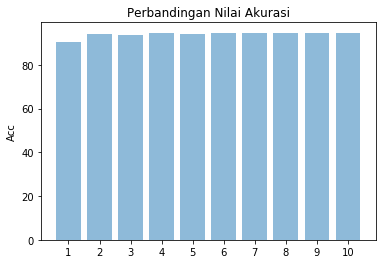

In [21]:
objects = np.arange(1,11)
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, acc_knns ,align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Acc')
plt.title('Perbandingan Nilai Akurasi')
 
plt.show()

### Perbandingan Nilai Akurasi setiap k pada kNN dengan oversampling

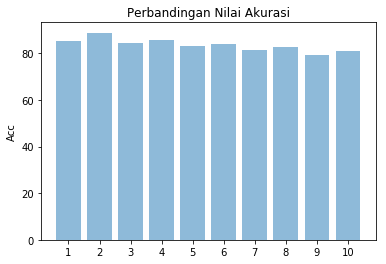

In [22]:
objects = np.arange(1,11)
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, acc_knns_us ,align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Acc')
plt.title('Perbandingan Nilai Akurasi')
 
plt.show()

### MLP tanpa oversampling

In [23]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train,y_train)
predictions = mlp.predict(x_valid)
cm_mlp = confusion_matrix(y_valid, predictions)
acc_mlp = accuracy_score(y_valid, predictions)
recall_mlp = recall_score(y_valid, predictions,average='macro')
precision_mlp = precision_score(y_valid, predictions,average='macro')
f1_mlp = f1_score(y_valid, predictions,average='macro')
print("Acc: ",str(acc_mlp), " || Precision: ",str(precision_mlp)," || Recall: ",str(recall_mlp)," || F1-Score: ",str(f1_mlp))


Acc:  0.7631856540084389  || Precision:  0.5264742306568414  || Recall:  0.5913992810544535  || F1-Score:  0.5075922862464283


### MLP dengan oversampling

In [24]:
from sklearn.neural_network import MLPClassifier
mlp_us = MLPClassifier()
mlp_us.fit(x_train_us,y_train_us)
predictions_us = mlp.predict(x_valid)
cm_mlp_us = confusion_matrix(y_valid, predictions_us)
acc_mlp_us = accuracy_score(y_valid, predictions_us)
recall_mlp_us = recall_score(y_valid, predictions_us,average='macro')
precision_mlp_us = precision_score(y_valid, predictions_us,average='macro')
f1_mlp_us = f1_score(y_valid, predictions_us,average='macro')
print("Acc: ",str(acc_mlp_us), " || Precision: ",str(precision_mlp_us)," || Recall: ",str(recall_mlp_us)," || F1-Score: ",str(f1_mlp_us))

Acc:  0.7631856540084389  || Precision:  0.5264742306568414  || Recall:  0.5913992810544535  || F1-Score:  0.5075922862464283


### Perbandingan Nilai Akurasi pada MLP tanpa oversampling dan dengan oversampling

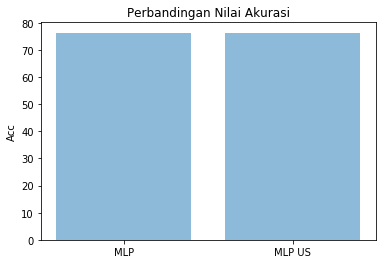

In [25]:
objects = ['MLP', 'MLP US']
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, [acc_mlp*100, acc_mlp_us*100] ,align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Acc')
plt.title('Perbandingan Nilai Akurasi')
 
plt.show()